In [ ]:
# run helper functions script to load packages, data and functions
%run -i helper_functions.py

##### Exploratory Data Analysis

In [11]:
train_data.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [12]:
train_data.shape

(7049, 31)

In [13]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [14]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

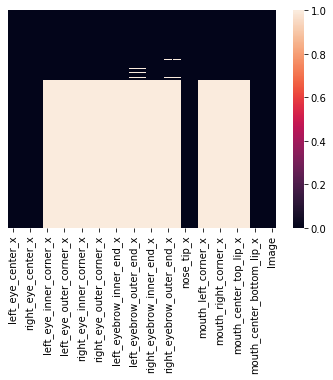

In [17]:
import seaborn as sns

# create heatmap to show data coverage by feature
# black columns have little or no missing data
sns.heatmap(train_data.isnull(),yticklabels = False)

In [21]:
# create loop to store indices of missing data by feature

missing_data_indices = []

for column in train_data[['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']]: 
     
    # Select column contents by column    
    # name using [] operator 
    missing_data_indices.append(train_data[train_data[column].isnull()].index.tolist())
    columnSeriesObj = train_data[column].isnull().sum()
    print('{:<20}     Missing: {:<10,d}     Pct Missing: {:<10.3f}'.format(column, columnSeriesObj, columnSeriesObj/train_data.shape[0]))

left_eye_center_x        Missing: 10             Pct Missing: 0.001     
left_eye_center_y        Missing: 10             Pct Missing: 0.001     
right_eye_center_x       Missing: 13             Pct Missing: 0.002     
right_eye_center_y       Missing: 13             Pct Missing: 0.002     
left_eye_inner_corner_x     Missing: 4,778          Pct Missing: 0.678     
left_eye_inner_corner_y     Missing: 4,778          Pct Missing: 0.678     
left_eye_outer_corner_x     Missing: 4,782          Pct Missing: 0.678     
left_eye_outer_corner_y     Missing: 4,782          Pct Missing: 0.678     
right_eye_inner_corner_x     Missing: 4,781          Pct Missing: 0.678     
right_eye_inner_corner_y     Missing: 4,781          Pct Missing: 0.678     
right_eye_outer_corner_x     Missing: 4,781          Pct Missing: 0.678     
right_eye_outer_corner_y     Missing: 4,781          Pct Missing: 0.678     
left_eyebrow_inner_end_x     Missing: 4,779          Pct Missing: 0.678     
left_eyebrow_inner_

In [39]:
# create function to split training data into new_train and new_dev
# def split_training_data(data):
    
#     # Shuffle the data, but make sure that the features and accompanying labels stay in sync.
#     np.random.seed(0)
#     shuffle = np.random.permutation(np.arange(data.shape[0]))
#     data.shape[shuffle]

#     # Split into 80% train and 20% dev.
#     new_train_length = round(data.shape[0]*.8,0)
#     new_dev_length = data.shape[0]-new_train_length
    
#     new_train_data, new_dev_data = data[:new_train_length], data[:new_dev_data]

#     return new_train_data, new_dev_data

# new_train_length = int(round(train_data.shape[0]*.8,0))
# new_dev_length = train_data.shape[0] - new_train_length

# new_train_data, new_dev_data = train_data[:new_train_length], train_data[new_train_length:]

# # from Justin
# X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)
# print(f"Train examples: {X_train.shape[0]}")
# print(f"Train labels: {y_train.shape[0]}")
# print(f"Dev examples: {X_dev.shape[0]}")
# print(f"Dev labels {y_dev.shape[0]}")

# from Medium article
# from torch.utils.data.sampler import SubsetRandomSampler

# def prepare_train_valid_loaders(trainset, valid_size=0.2, 
#                                 batch_size=128):
#     '''
#     Split trainset data and prepare DataLoader for training and validation
    
#     Args:
#         trainset (Dataset): data 
#         valid_size (float): validation size, defalut=0.2
#         batch_size (int) : batch size, default=128
#     ''' 
    
#     # obtain training indices that will be used for validation
#     num_train = len(trainset)
#     indices = list(range(num_train))
#     np.random.shuffle(indices)
#     split = int(np.floor(valid_size * num_train))
#     train_idx, valid_idx = indices[split:], indices[:split]
    
#     # define samplers for obtaining training and validation batches
#     train_sampler = SubsetRandomSampler(train_idx)
#     valid_sampler = SubsetRandomSampler(valid_idx)
    
#     # prepare data loaders
#     train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                                sampler=train_sampler)
#     valid_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                                sampler=valid_sampler)
    
#     return train_loader, valid_loader

In [107]:
# # ignore
# # do not use
# train_data_for_clstr = train_data.drop('Image', axis=1)
# train_data_for_clstr.columns
# train_data_for_clstr2 = train_data_for_clstr.fillna(method='ffill')

In [108]:
# # ignore
# # use K means clustering to cluster training data
# from sklearn.cluster import KMeans

# km = KMeans (n_clusters=15, init='k-means++')
# clstrs15 = km.fit(train_data_for_clstr2)
# print(clstrs15.cluster_centers_.shape)
# print(clstrs15.cluster_centers_)

In [34]:
# fig, axes = plt.subplots(nrows=3, ncols=5, sharex=False, sharey=False, figsize = (16, 8))
# for ii in np.arange (0, train_data_for_clstr2.shape[1]):
#     ax = axes[ii]
#     ax.hist(train_data_for_clstr2[:,ii], bins = 30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
#     ax.scatter (x = clstrs15.cluster_centers_[:,ii], y = np.zeros(5), c = 'red', s = 100)
#     ax.set_title(Names[ii])

# plt.show()

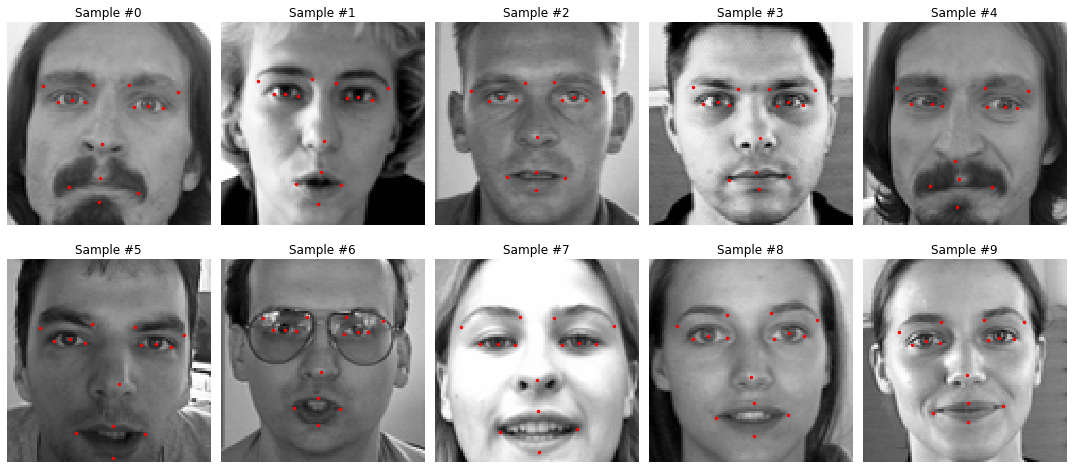

In [206]:
# show examples of images with marks for facial keypoints
show_images(train_data, range(10))

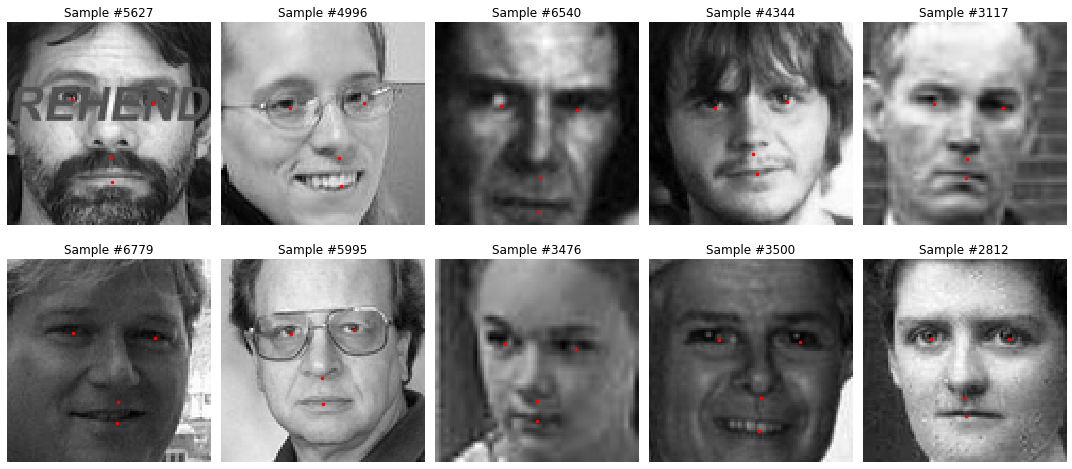

In [36]:
# show examples of images with missing data
missing_any_data = train_data[train_data.isnull().any(axis=1)]
idxs = np.random.choice(missing_any_data.index, 10)
show_images(train_data, idxs)


Examples of images missing left_eye_center_x


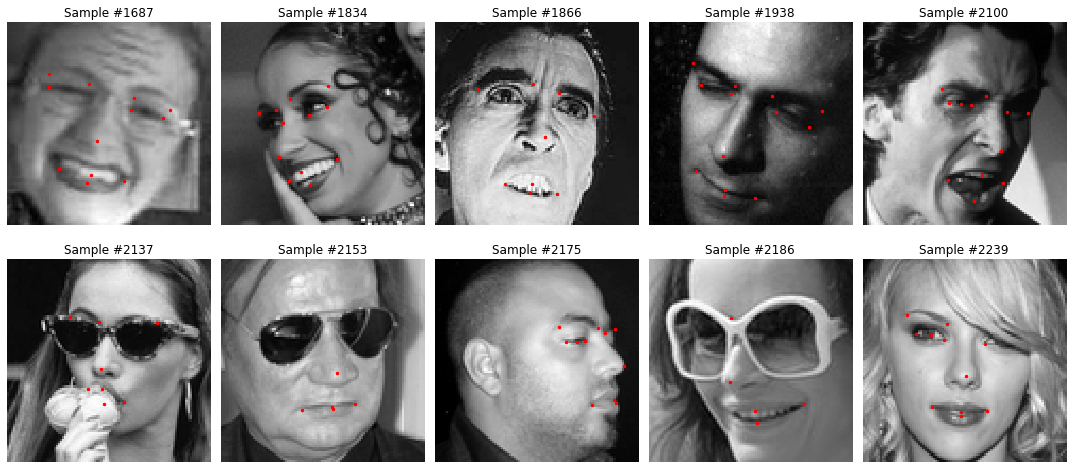


Examples of images missing left_eye_center_y


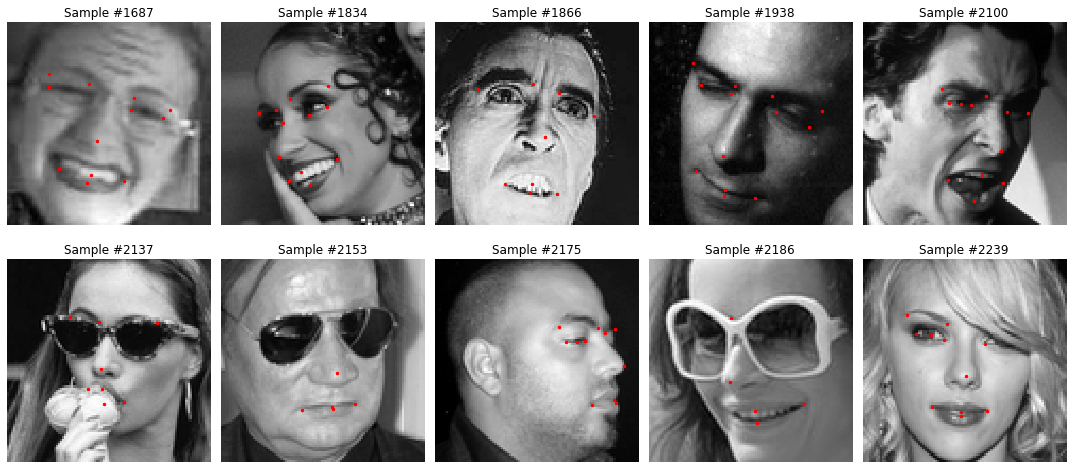


Examples of images missing right_eye_center_x


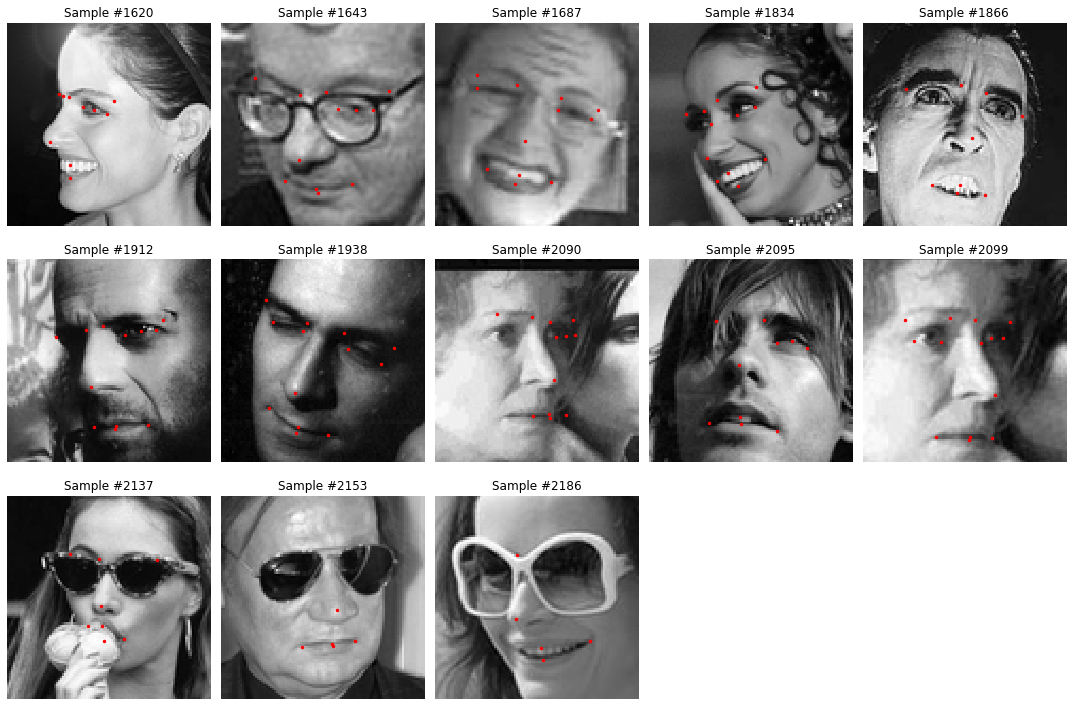


Examples of images missing right_eye_center_y


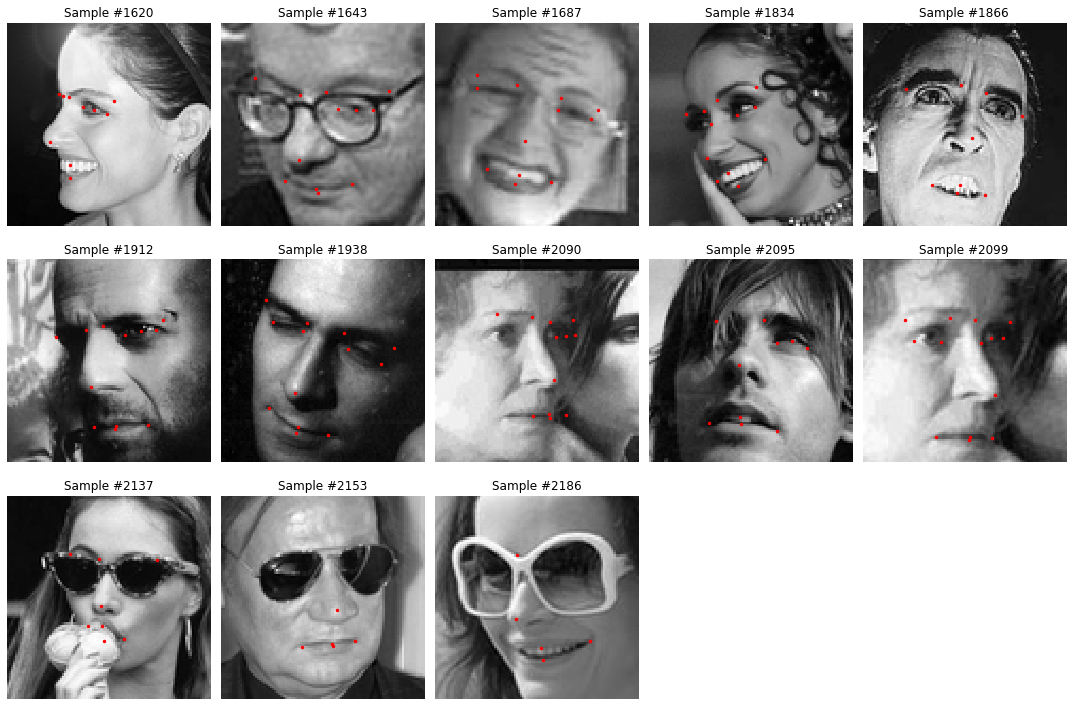


Examples of images missing left_eye_inner_corner_x


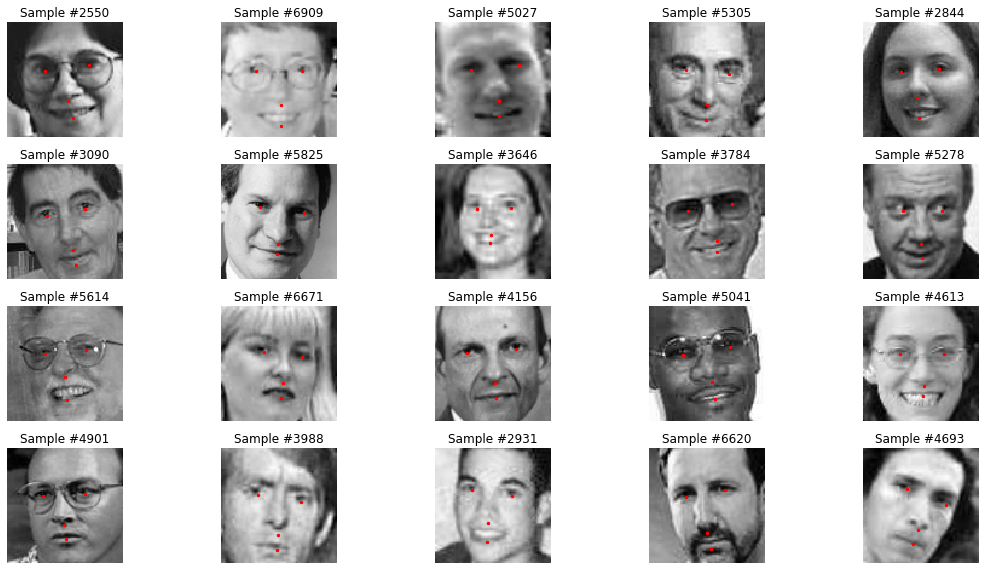


Examples of images missing left_eye_inner_corner_y


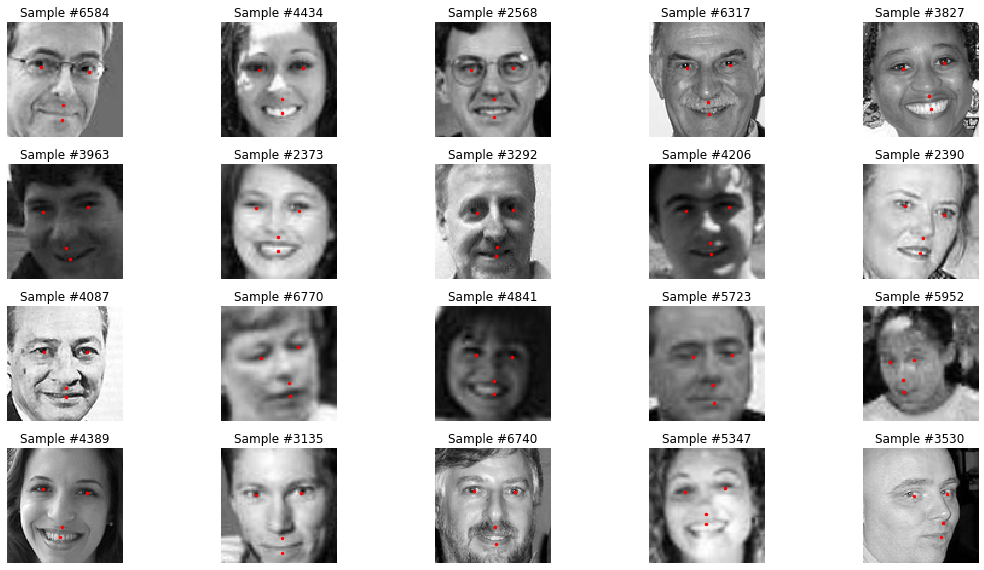


Examples of images missing left_eye_outer_corner_x


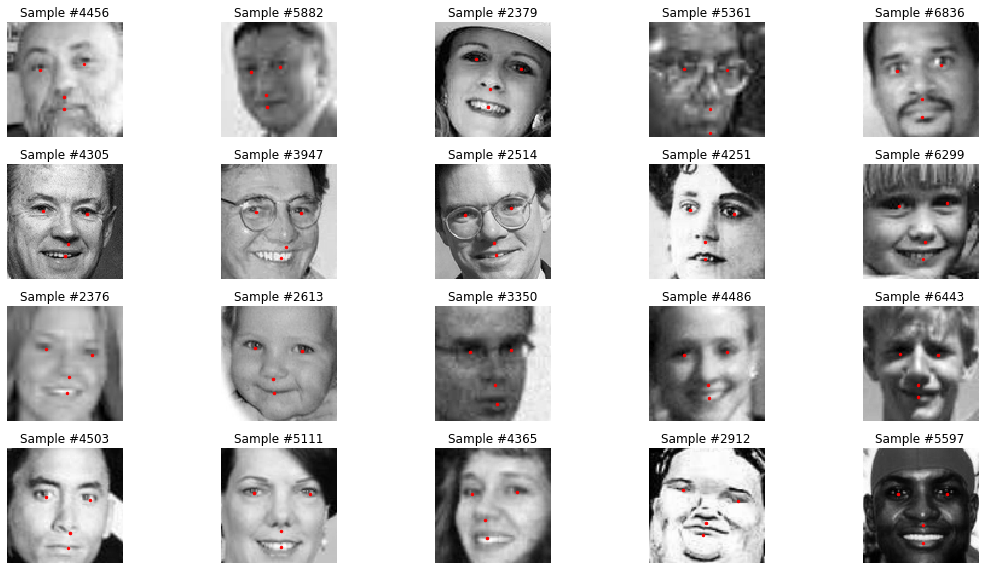


Examples of images missing left_eye_outer_corner_y


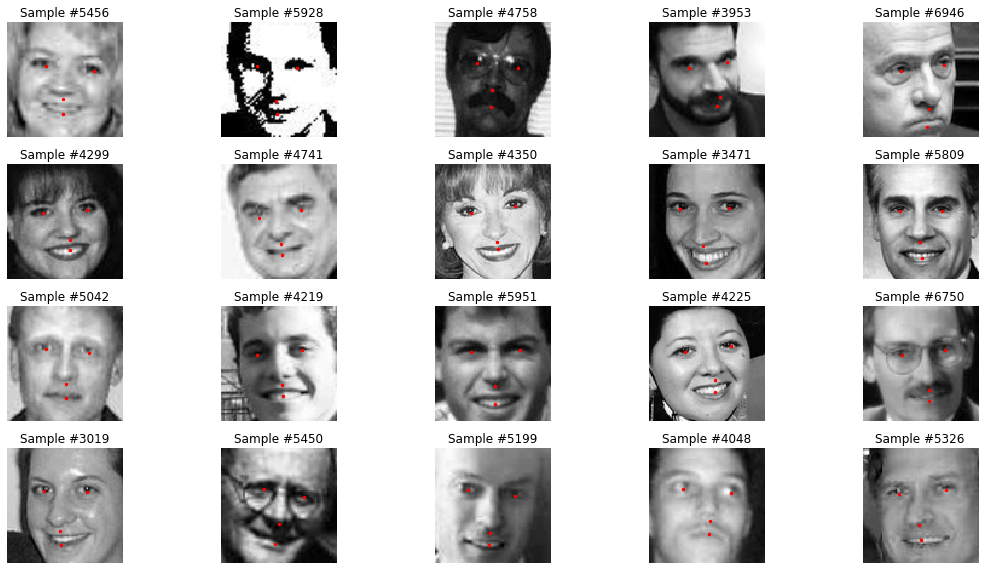


Examples of images missing right_eye_inner_corner_x


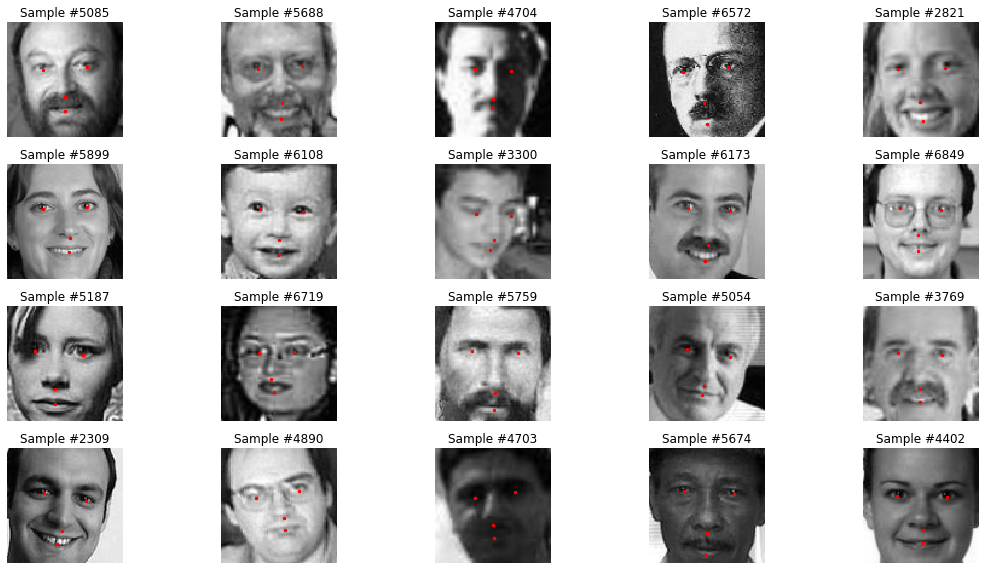


Examples of images missing right_eye_inner_corner_y


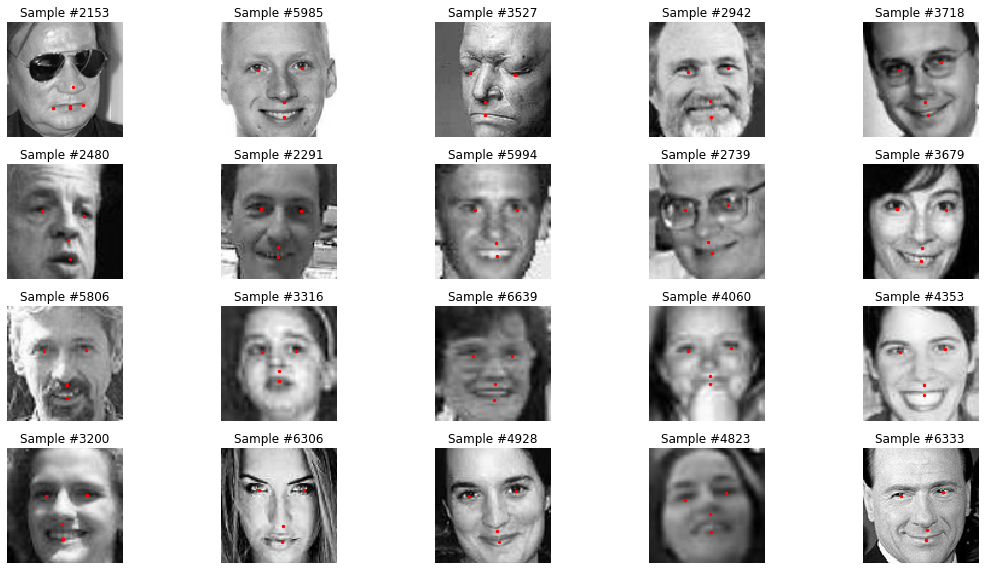


Examples of images missing right_eye_outer_corner_x


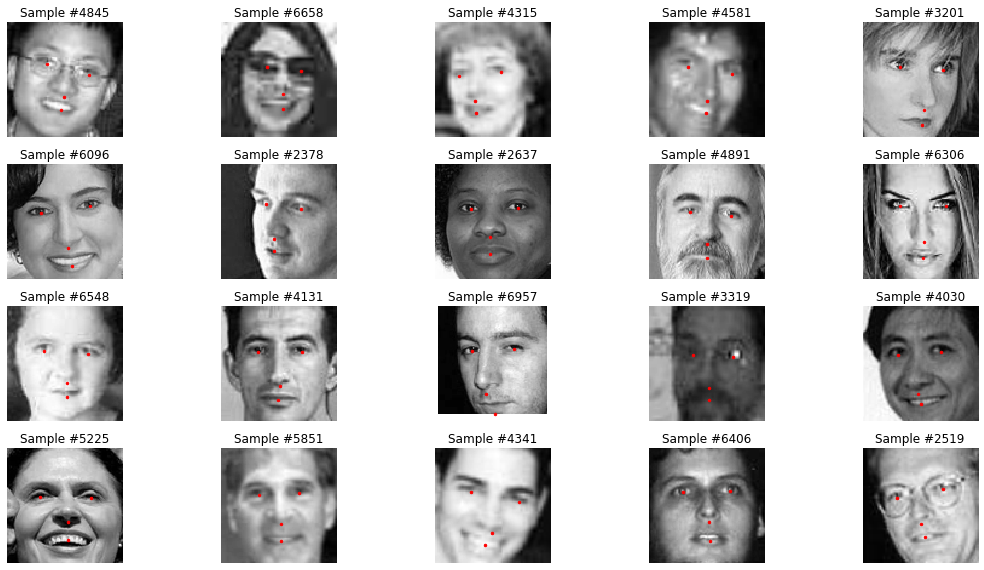


Examples of images missing right_eye_outer_corner_y


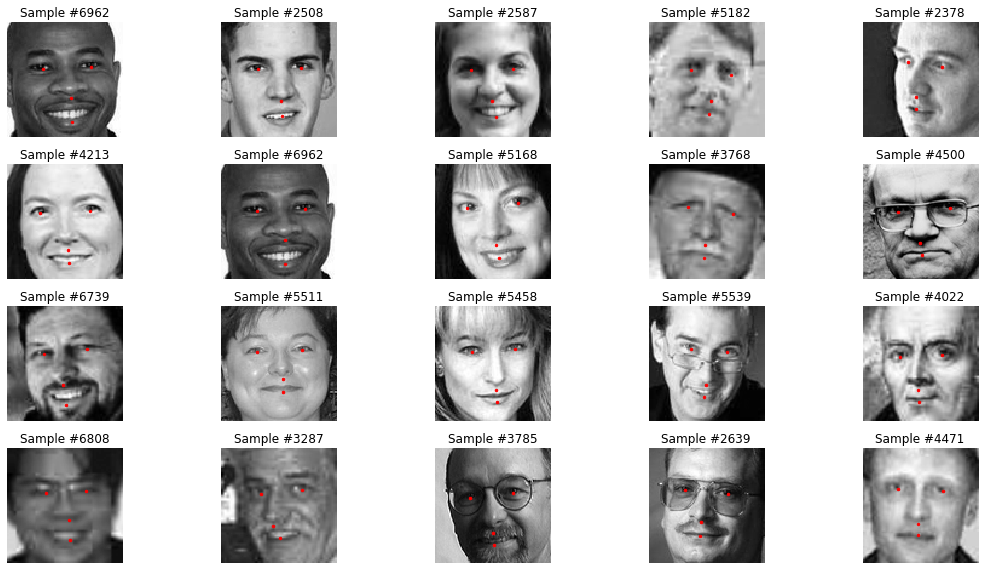


Examples of images missing left_eyebrow_inner_end_x


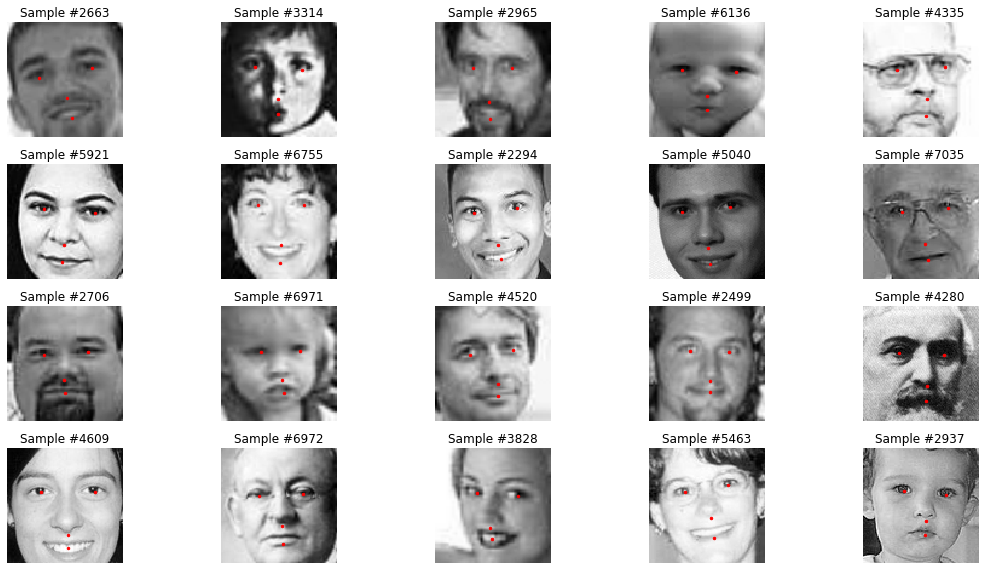


Examples of images missing left_eyebrow_inner_end_y


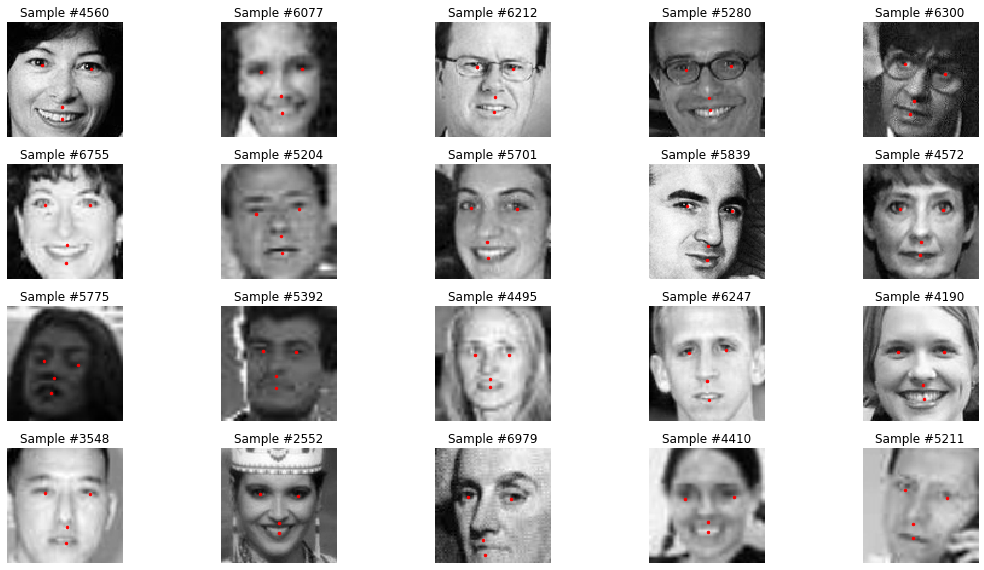


Examples of images missing left_eyebrow_outer_end_x


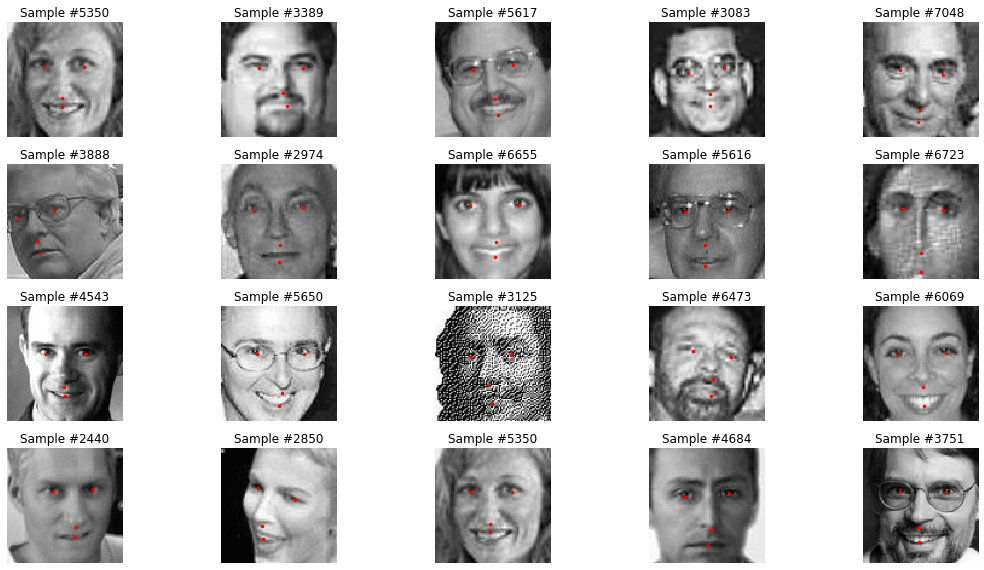


Examples of images missing left_eyebrow_outer_end_y


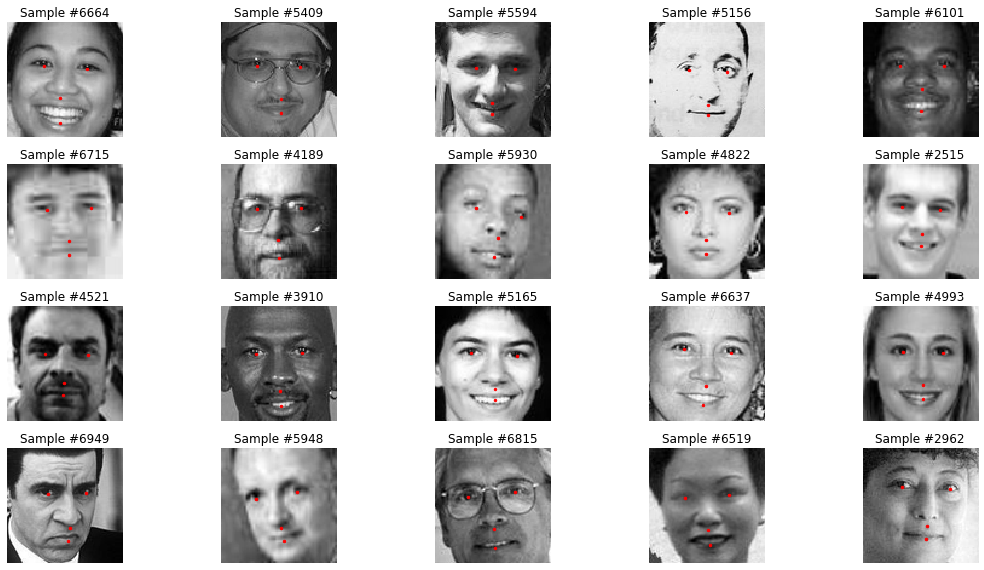


Examples of images missing right_eyebrow_inner_end_x


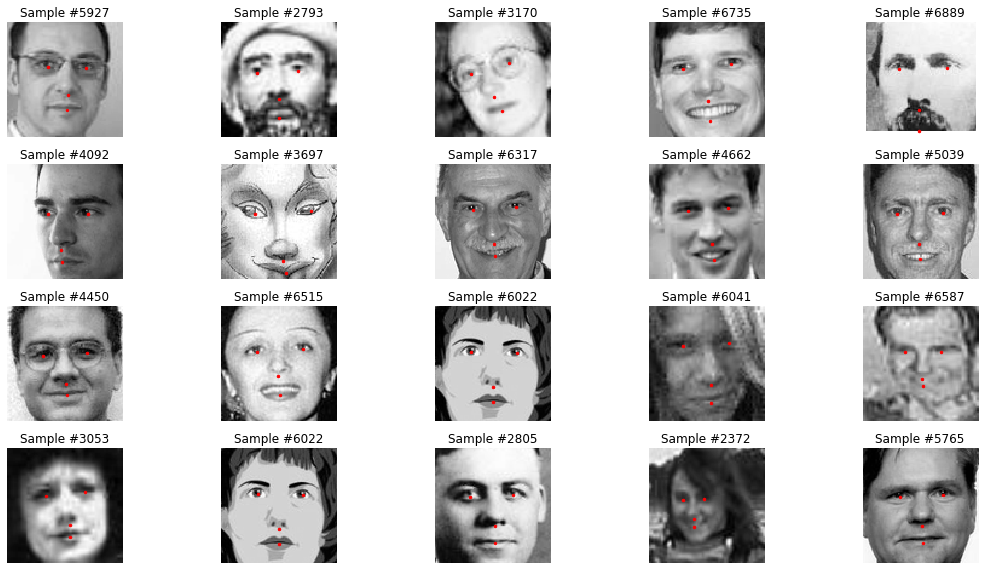


Examples of images missing right_eyebrow_inner_end_y


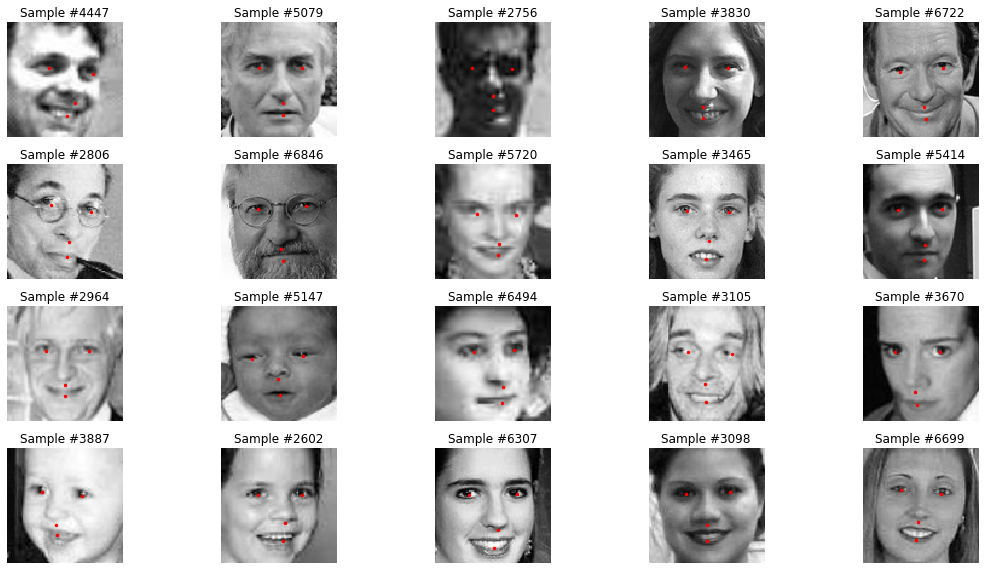


Examples of images missing right_eyebrow_outer_end_x


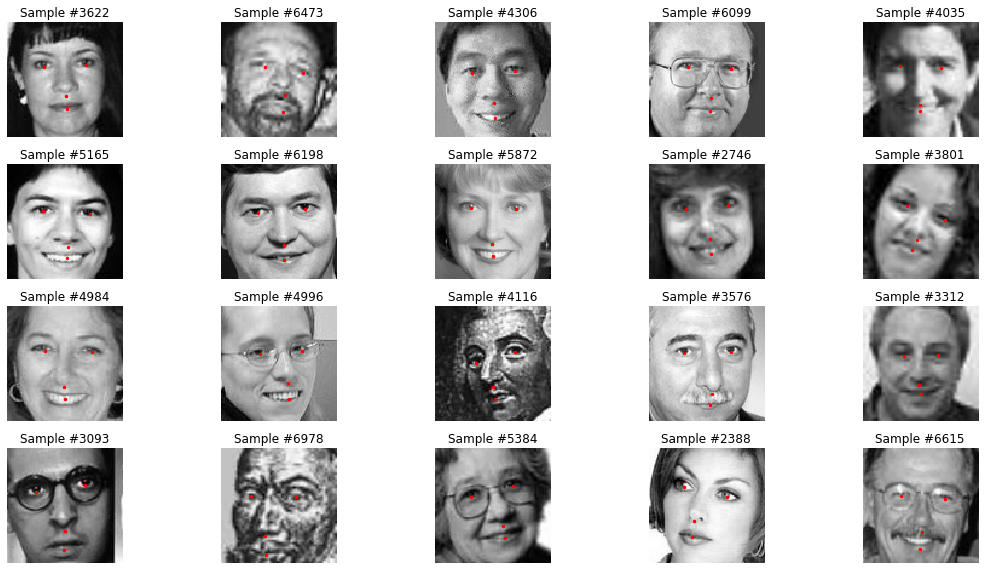


Examples of images missing right_eyebrow_outer_end_y


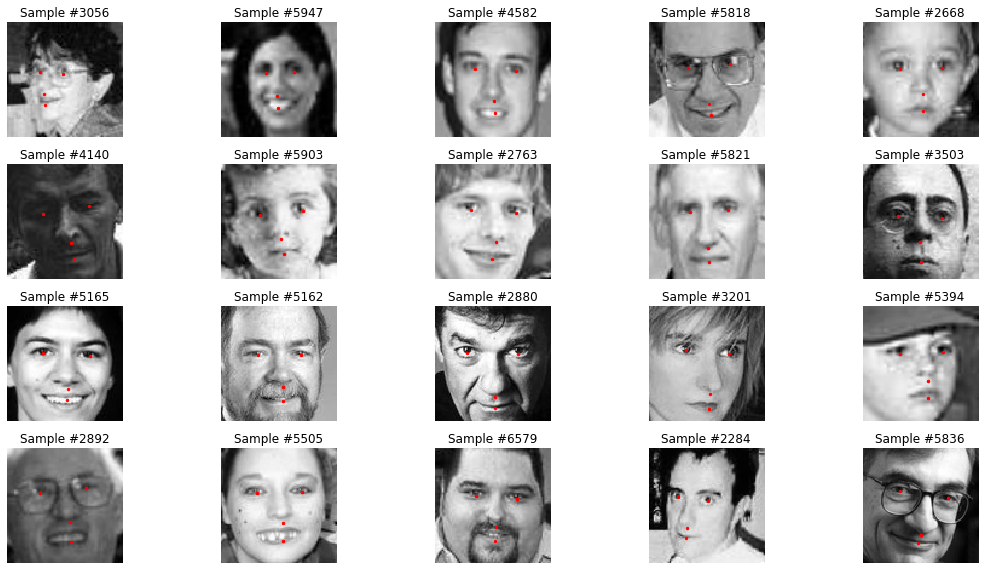


Examples of images missing mouth_left_corner_x


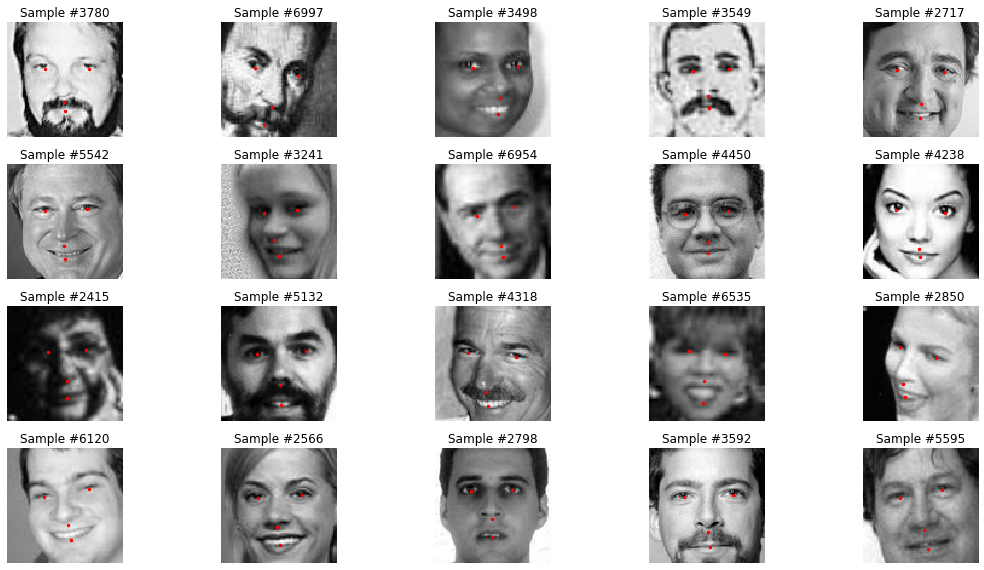


Examples of images missing mouth_left_corner_y


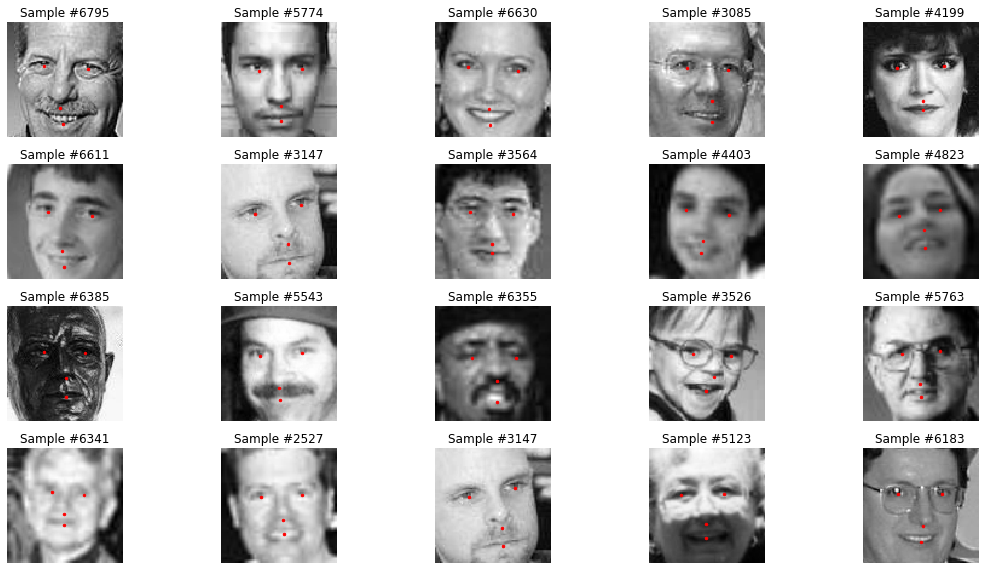


Examples of images missing mouth_right_corner_x


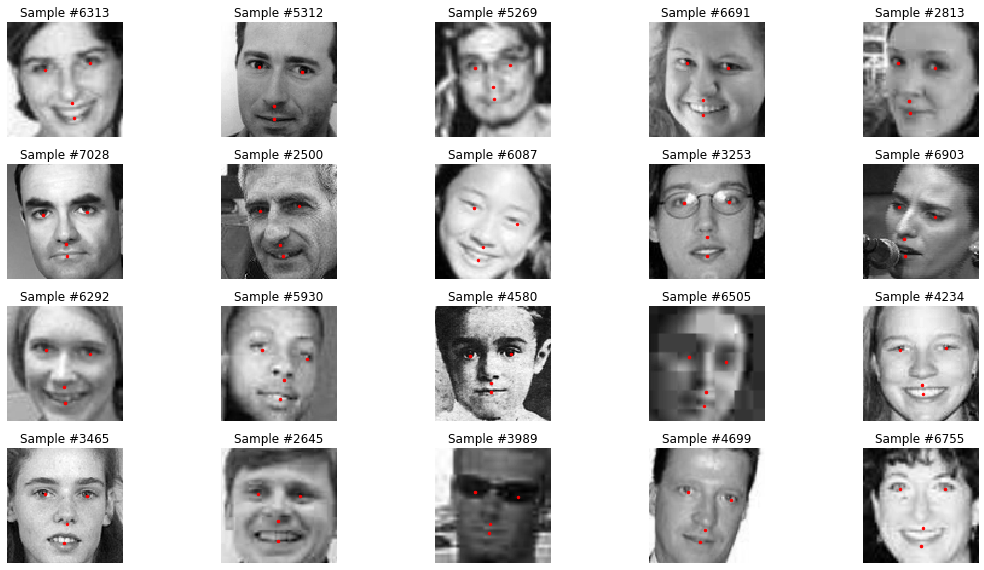


Examples of images missing mouth_right_corner_y


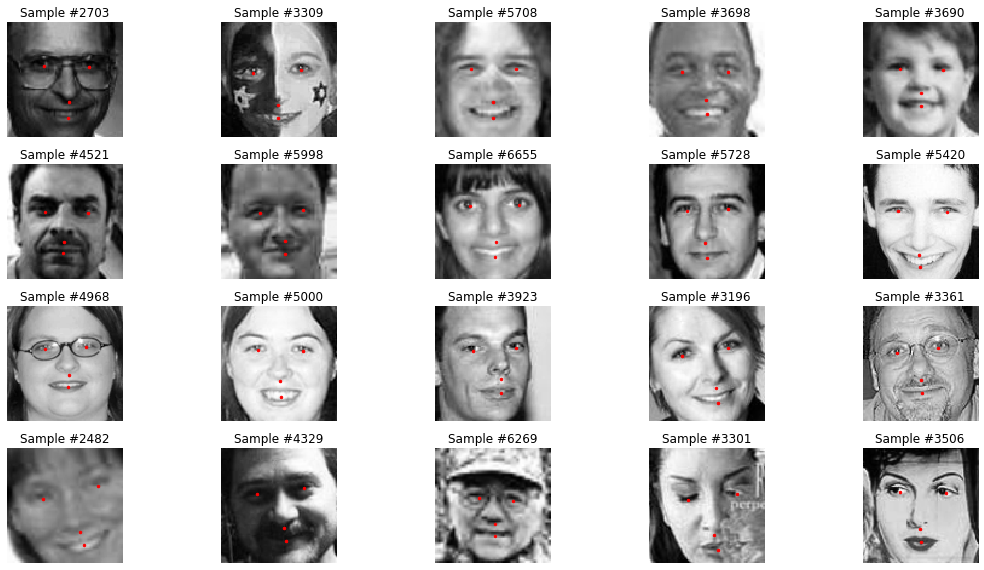


Examples of images missing mouth_center_top_lip_x


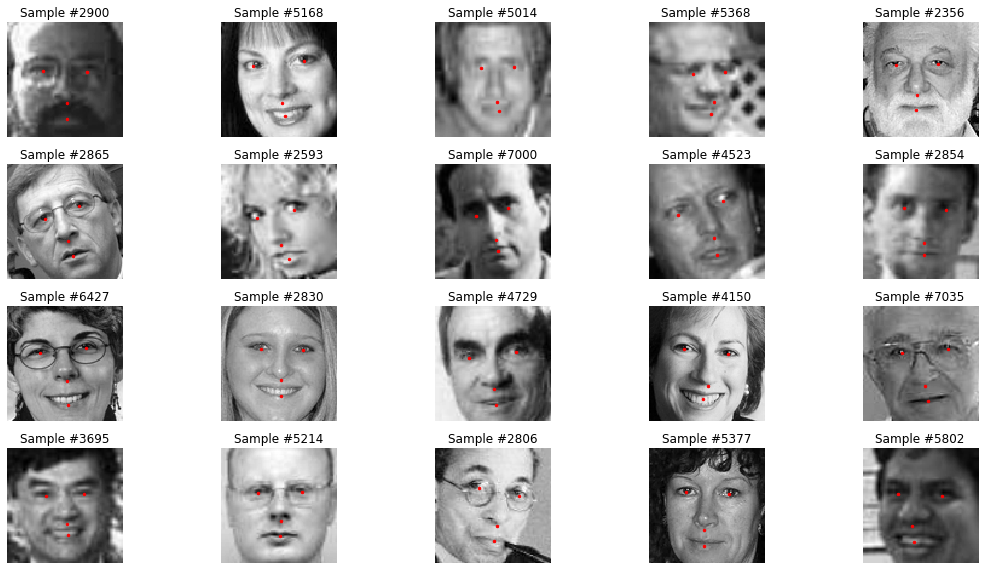


Examples of images missing mouth_center_top_lip_y


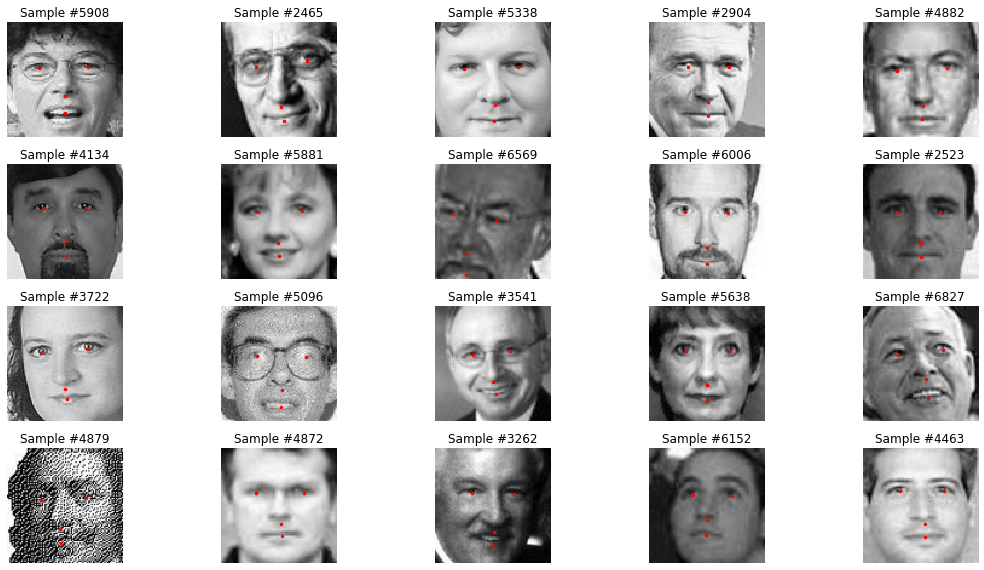


Examples of images missing mouth_center_bottom_lip_x


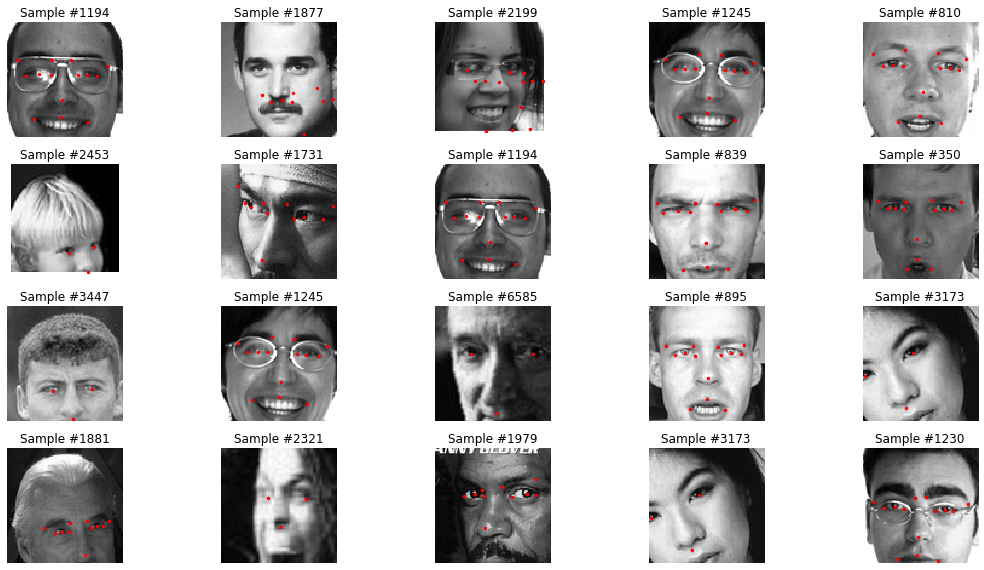


Examples of images missing mouth_center_bottom_lip_y


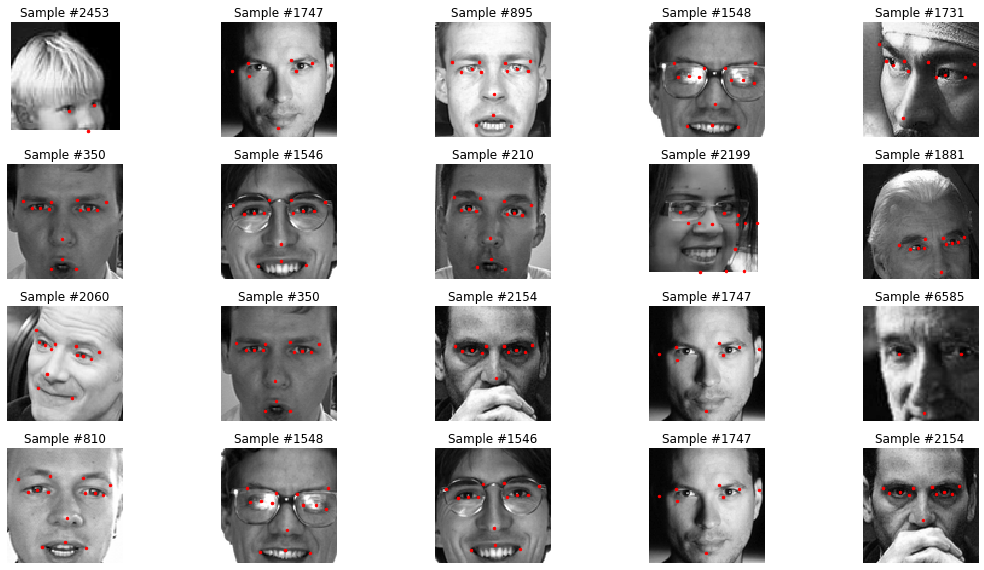

In [37]:
# show examples of up to 20 images with missing data for each column

column_labels = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y']

for i in range(len(column_labels)):
    if len(missing_data_indices[i]) == 0:
        continue
    elif len(missing_data_indices[i]) <=20:
        print("\nExamples of images missing {}".format(column_labels[i]))
        show_images(train_data, missing_data_indices[i])
    else:
        print("\nExamples of images missing {}".format(column_labels[i]))
        rnd_ind = np.random.choice(missing_data_indices[i], 20)
        show_images(train_data, rnd_ind)

In [38]:
# confirm whether there is any missing data for only of the x,y coordinates
# associated with a facial keypoint

len(missing_data_indices)
for i in range(0, 30, 2):
    a = missing_data_indices[i]==missing_data_indices[i+1]
    print("i = {}; {}".format(i, a))

i = 0; True
i = 2; True
i = 4; True
i = 6; True
i = 8; True
i = 10; True
i = 12; True
i = 14; True
i = 16; True
i = 18; True
i = 20; True
i = 22; True
i = 24; True
i = 26; True
i = 28; True


##### Create training data scenarios based on options to handle missing values

In [109]:
# create 'partial' (missing values) dataset from train_data

train_data_partial = train_data.dropna()
print("Shape of training dataset with no missing values: {}".format(train_data_partial.shape))

Shape of training dataset with no missing values: (2140, 31)


In [120]:
%%time

# separate data into features and labels using helper functions

X_full = get_features(train_data, dim=2)
y_full = get_labels(train_data)
X_test = get_features(test_data, dim=2)

print("Full training data with missing values:")
print("Training features shape: {}".format(X_full.shape))
print("Training labels shape: {}".format(y_full.shape))
print("Test features shape: {}".format(X_test.shape))

Full training data with missing values:
Training features shape: (7049, 96, 96, 1)
Training labels shape: (7049, 30)
Test features shape: (1783, 96, 96, 1)
Wall time: 27.9 s


In [199]:
%%time

# drop rows with missing values
# get features function didn't work after rows were dropped

def load_images(image_data):
    images = []
    for idx, df in image_data.iterrows():
        image = np.array(df['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)
    return images

X_partial = load_images(train_data_partial)

y_partial = train_data_partial.drop("Image", axis = 1).to_numpy()

print("Partial training data with NO missing values:")
print("Training features shape: {}".format(X_partial.shape))
print("Training labels shape: {}".format(y_partial.shape))

Partial training data with NO missing values:
Training features shape: (2140, 96, 96, 1)
Training labels shape: (2140, 30)
Wall time: 3.64 s


In [167]:
# image pixels not yet normalized.  Need to divide by 255.
# consider adding as a helper function

def convert_images(image_data):
    temp = np.array(image_data)/255
    return temp

X_full_converted = convert_images(X_full)
X_partial_converted = convert_images(X_partial)
X_test_converted = convert_images(X_test)

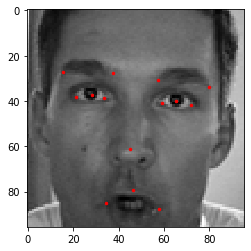

In [213]:
fig, axis = plt.subplots()
plot_img(X_full_converted[210], y_full[210], axis)

In [203]:
# create function to flip images horizontally

def flip_horizontal(features, labels):
    flipped_labels = []
    flipped_features = np.flip(features, axis=2)
    for index, value in enumerate(labels):
        flipped_labels.append([96.-coor if index%2==0 else coor for index, coor in enumerate(value)])
    return flipped_features, np.asarray(flipped_labels)

In [204]:
test_feat, test_lab = flip_horizontal(X_full_converted, y_full)
print(test_feat.shape)
print(test_lab.shape)

(7049, 96, 96, 1)
(7049, 30)


In [207]:
def plot_img(image, label, axis):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(label[0::2], label[1::2], s=24, marker ='.', c='r')

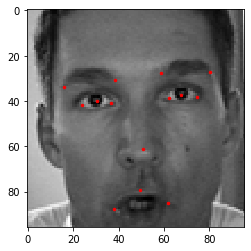

In [212]:
# show example
fig, axis = plt.subplots()
plot_img(test_feat[210], test_lab[210], axis)

In [200]:
print(type(X_full_converted), X_full_converted.shape)
print(type(X_partial_converted), X_partial_converted.shape)
print(type(y_full), y_full.shape)
print(type(y_partial), y_partial.shape)

<class 'numpy.ndarray'> (7049, 96, 96, 1)
<class 'numpy.ndarray'> (2140, 96, 96, 1)
<class 'numpy.ndarray'> (7049, 30)
<class 'numpy.ndarray'> (2140, 30)


In [201]:
test_feat2, test_lab2 = flip_horizontal(X_partial_converted, y_partial)
print(test_feat2.shape)
print(test_lab2.shape)

(2140, 96, 96, 1)
(2140, 30)


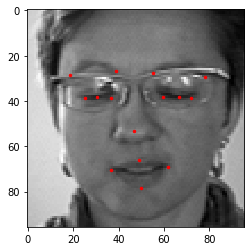

In [214]:
# show example
fig, axis = plt.subplots()
plot_img(test_feat2[210], test_lab2[210], axis)

In [2]:
# create function to rotate images
# https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point

# arbitary list of angles to use to rotate the images
angle_list = [5, 7.5, 10, 12.5, 15] 

def perform_rotation(features, labels):
    rotated_labels = []
    rotated_features = []
    for item in angle_list:    
        for angle in [item,-item]:
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_radians = -angle*pi/180. 
            
            # features
            for feat in features:
                rotated_feat = cv2.warpAffine(feat, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_features.append(rotated_feat)
            
            # labels
            for lab in labels:
                rotated_lab = lab - 48.
                for idx in range(0,len(rotated_lab),2):
                    # https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point
                    rotated_lab[idx] = rotated_lab[idx]*cos(angle_radians)-rotated_lab[idx+1]*sin(angle_radians)
                    rotated_lab[idx+1] = rotated_lab[idx]*sin(angle_radians)+rotated_lab[idx+1]*cos(angle_radians)
                rotated_lab += 48.   # Add the earlier subtracted value
                rotated_labels.append(rotated_lab)
            
    return np.reshape(rotated_features,(-1,96,96,1)), np.asarray(rotated_labels)

In [3]:
test_feat, test_lab = perform_rotation(X_full_converted, y_full)
print(test_feat.shape)
print(test_lab.shape)

NameError: name 'X_full_converted' is not defined

In [ ]:
# show example
fig, axis = plt.subplots()
plot_img(test_feat[210], test_lab[210], axis)

In [184]:
# create function to update image lighting

# arbitrary list of lighting factors to use to brighten/dim the images
lighting_factor_list = [0.5, 0.75, 1.25, 1.5]

def update_lighting(features, labels):
    updated_features = []
    updated_labels = []
    for item in lighting_factor_list:
        new_features = np.clip(features*item, 0.0, 1.0)
        updated_features.extend(new_features)
        updated_labels.extend(labels)
    return np.asarray(updated_features), np.asarray(updated_labels)

In [185]:
%%time
test_feat, test_lab = update_lighting(X_full_converted, y_full)
print(test_feat.shape)
print(test_lab.shape)

(28196, 96, 96, 1)
(28196, 30)
Wall time: 2.36 s


In [159]:
# create function to move the center of the image up, down, left and right

# arbitrary list of pixel values to use to move center of image
pixel_moves = [4, 8, 16, 32]

def move_center(features, labels):
    shifted_features = []
    shifted_labels = []
    for item in pixel_moves:
        for (xval,yval) in [(item,item),(-item,item),(item,-item),(-item,-item)]:
            M = np.float32([[1,0,xval],[0,1,yval]])
            for feat, lab in zip(features, labels):
                shifted_feature = cv2.warpAffine(feat, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_label = np.array([(point+xval) if idx%2==0 else (point+yval) for idx, point in enumerate(lab)])
                if np.all(0.0<shifted_label) and np.all(shifted_label<96.0):
                    shifted_features.append(shifted_feature.reshape(96,96,1))
                    shifted_labels.append(shifted_label)
    shifted_labels = np.clip(shifted_labels,0.0,96.0)
    return np.asarray(shifted_features), shifted_labels

In [186]:
%%time
test_feat, test_lab = move_center(X_full_converted, y_full)
print(test_feat.shape)
print(test_lab.shape)

(19278, 96, 96, 1)
(19278, 30)
Wall time: 16 s


In [160]:
# create function to add noise to images

# arbitrary noise factor
noise_factor = 0.02

def add_noise(features, labels):
    noise_features = []
    for feat in features:
        noise_feat = cv2.add(feat, noise_factor*np.random.randn(96,96,1))
        noise_features.append(noise_feat.reshape(96,96,1))
    return np.asarray(noise_features), labels

In [187]:
%%time
test_feat, test_lab = add_noise(X_full_converted, y_full)
print(test_feat.shape)
print(test_lab.shape)

(7049, 96, 96, 1)
(7049, 30)
Wall time: 1.87 s


In [98]:
# create function to scale image larger and smaller

# see https://medium.com/@prasad.pai/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9#8be0
# tbd

In [99]:
# create function to add graininess to the images

# Salt and pepper addition
# tbd - add noise function may be sufficient

In [96]:
# create function to add blur to the images

# Gaussian blur
# tbd

In [202]:
%%time

# build up training dataset using augmentation methods

# for partial dataset

# # control table used to apply augmentation methods; code currently assumes all are set to True
# # ignore
# flip = True
# rotate = True
# light = True
# move = True
# noise = True

# progress through augmentations
print("\nPartial training data with NO missing values\nBefore augmentation steps:\nFeatures shape: {}     Labels shape: {}".format(X_partial_converted.shape, y_partial.shape))

# flip
X_partial_flip, y_partial_flip = flip_horizontal(X_partial_converted, y_partial)
X_partial_accum = np.concatenate((X_partial_converted, X_partial_flip))
y_partial_accum = np.concatenate((y_partial, y_partial_flip))
print("\nAfter flipping horizontally:\nFeatures shape: {}     Labels shape: {}".format(X_partial_accum.shape, y_partial_accum.shape))

# rotate
X_partial_rotate, y_partial_rotate = perform_rotation(X_partial_converted, y_partial)
X_partial_accum = np.concatenate((X_partial_accum, X_partial_rotate))
y_partial_accum = np.concatenate((y_partial_accum, y_partial_rotate))
print("\nAfter performing rotations:\nFeatures shape: {}     Labels shape: {}".format(X_partial_accum.shape, y_partial_accum.shape))
    
# light
X_partial_light, y_partial_light = update_lighting(X_partial_converted, y_partial)
X_partial_accum = np.concatenate((X_partial_accum, X_partial_light))
y_partial_accum = np.concatenate((y_partial_accum, y_partial_light))
print("\nAfter updating lighting:\nFeatures shape: {}     Labels shape: {}".format(X_partial_accum.shape, y_partial_accum.shape))
    
# move
X_partial_move, y_partial_move = move_center(X_partial_converted, y_partial)
X_partial_accum = np.concatenate((X_partial_accum, X_partial_move))
y_partial_accum = np.concatenate((y_partial_accum, y_partial_move))
print("\nAfter moving the image center:\nFeatures shape: {}     Labels shape: {}".format(X_partial_accum.shape, y_partial_accum.shape))
    
# add noise
X_partial_noise, y_partial_noise = add_noise(X_partial_converted, y_partial)
X_partial_accum = np.concatenate((X_partial_accum, X_partial_noise))
y_partial_accum = np.concatenate((y_partial_accum, y_partial_noise))
print("\nAfter adding noise:\nFeatures shape: {}     Labels shape: {}".format(X_partial_accum.shape, y_partial_accum.shape))
    


Partial training data with NO missing values
Before augmentation steps:
Features shape: (2140, 96, 96, 1)     Labels shape: (2140, 30)

After flipping horizontally:
Features shape: (4280, 96, 96, 1)     Labels shape: (4280, 30)

After performing rotations:
Features shape: (25680, 96, 96, 1)     Labels shape: (25680, 30)

After updating lighting:
Features shape: (34240, 96, 96, 1)     Labels shape: (34240, 30)

After moving the image center:
Features shape: (53518, 96, 96, 1)     Labels shape: (53518, 30)

After adding noise:
Features shape: (55658, 96, 96, 1)     Labels shape: (55658, 30)
Wall time: 28.6 s


In [194]:
%%time

# build up training dataset using augmentation methods

# for full dataset

# progress through augmentations
print("\nFull training data with missing values\nBefore augmentation steps:\nFeatures shape: {}     Labels shape: {}".format(X_full_converted.shape, y_full.shape))

# flip
X_full_flip, y_full_flip = flip_horizontal(X_full_converted, y_full)
X_full_accum = np.concatenate((X_full_converted, X_full_flip))
y_full_accum = np.concatenate((y_full, y_full_flip))
print("\nAfter flipping horizontally:\nFeatures shape: {}     Labels shape: {}".format(X_full_accum.shape, y_full_accum.shape))

# rotate
X_full_rotate, y_full_rotate = perform_rotation(X_full_converted, y_full)
X_full_accum = np.concatenate((X_full_accum, X_full_rotate))
y_full_accum = np.concatenate((y_full_accum, y_full_rotate))
print("\nAfter performing rotations:\nFeatures shape: {}     Labels shape: {}".format(X_full_accum.shape, y_full_accum.shape))
    
# light
X_full_light, y_full_light = update_lighting(X_full_converted, y_full)
X_full_accum = np.concatenate((X_full_accum, X_full_light))
y_full_accum = np.concatenate((y_full_accum, y_full_light))
print("\nAfter updating lighting:\nFeatures shape: {}     Labels shape: {}".format(X_full_accum.shape, y_full_accum.shape))
    
# move
X_full_move, y_full_move = move_center(X_full_converted, y_full)
X_full_accum = np.concatenate((X_full_accum, X_full_move))
y_full_accum = np.concatenate((y_full_accum, y_full_move))
print("\nAfter moving the image center:\nFeatures shape: {}     Labels shape: {}".format(X_full_accum.shape, y_full_accum.shape))
    
# add noise
X_full_noise, y_full_noise = add_noise(X_full_converted, y_full)
X_full_accum = np.concatenate((X_full_accum, X_full_noise))
y_full_accum = np.concatenate((y_full_accum, y_full_noise))
print("\nAfter adding noise:\nFeatures shape: {}     Labels shape: {}".format(X_full_accum.shape, y_full_accum.shape))
    


Full training data with missing values
Before augmentation steps:
Features shape: (7049, 96, 96, 1)     Labels shape: (7049, 30)

After flipping horizontally:
Features shape: (14098, 96, 96, 1)     Labels shape: (14098, 30)

After performing rotations:
Features shape: (84588, 96, 96, 1)     Labels shape: (84588, 30)

After updating lighting:
Features shape: (112784, 96, 96, 1)     Labels shape: (112784, 30)

After moving the image center:
Features shape: (132062, 96, 96, 1)     Labels shape: (132062, 30)

After adding noise:
Features shape: (139111, 96, 96, 1)     Labels shape: (139111, 30)
Wall time: 2min 14s


In [ ]:
# # create function to create various versions of training data

# def handle_missing_data(data):
#     # create empty list to store results
#     no_missing_values_dataframes =[]
#     no_missing_values_methods = []
#     with_missing_values_dataframes = []
#     with_missing_values_methods
    
#     # options with no missing values
    
#     # option 1: drop na values
#     no_missing_values_dataframes.append(data.dropna())
#     no_missing_values_methods.append("no_missing_values")
    
#     # option 3: backfill na values
#     updated_dataframe_list.append(data.fillna(method = 'bfill'))
#     method_list.append("backfill_missing_values")
    
#     # option 4: forward fill na values
#     updated_dataframe_list.append(data.fillna(method = 'ffill'))
#     method_list.append("forward_fill_missing_values")
    
#     # option 5: horizontal flip
#     updated_dataframe_list.append(data.fillna(method = 'ffill'))
#     method_list.append("forward_fill_missing_values")
    